In [1]:
from gymEnvs import *

(2, 2) (2, 2)


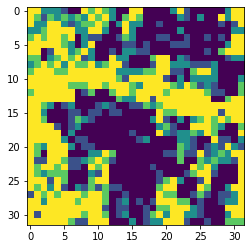

In [2]:
env = IsingEnv(n=32,N=64)
obs,rew,done,_ = env.step(0)
plt.imshow(obs[0])
plt.show()

In [3]:
env.M,env.E

(-0.6834729830259512, -1.859354636110473)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


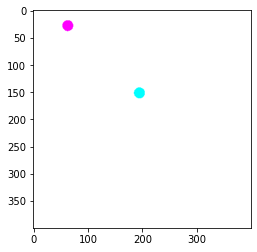

In [4]:
env.render()

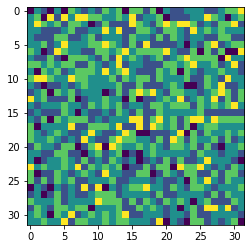

In [5]:
for x in range(1000):
    obs,rew,done,_ = env.step(1)
plt.imshow(obs[0])
plt.show()

In [6]:
import ipywidgets as widgets
import time
from threading import Thread,Lock
from ipycanvas import Canvas
from ipywidgets import Image, HBox
from IPython.display import HTML, clear_output
from traitlets import dlink
#canvas = Canvas(width=512, height=512)
controller = widgets.Controller(
    index=0,
)
controller

Controller()

In [7]:
def fig2img(fig,axs,crop=False,fixrgb=True):
    """This converts a matplotlib figure into an image, note: it runds kind of slowly
    Paramaters:
    fig -- the figure you get from calling fig = plt.figure()
    axs -- the axis you get from calling   axs = plt.gca()
    crop (bool) -- whether or not to crop the output image to remove the tranparent padding
    fixrgb (bool) -- True to call to_rgb on the output rgba image, false to just take the rgb channels
    """
    #ax.axis('off')
    fig.tight_layout()
    fig.canvas.draw()
    
    argb = np.fromstring(fig.canvas.tostring_argb(), dtype=np.uint8, sep='')
    argb = argb.reshape(fig.canvas.get_width_height()[::-1] + (4,))
    #plt.close()
    return to_rgb(argb) if fixrgb else argb[:,:,1:]

In [8]:
class Render(Thread):
    def __init__(self, canvas,pad,env,controls={'mew':0,'T':0,'start':False}):
        self.canvas = canvas
        self.isalive=True
        #self.pad = widgets.Controller(index=0)
        self.pad=pad
        self.controls=controls
        pad.observe(self.callback)
        self.env=env()
        super(Render, self).__init__()
    def callback(self,change):
        for joy_stick_index, axis in enumerate(change['owner'].axes):
            if joy_stick_index==1:
                self.controls['T']=-axis.value
            if joy_stick_index==0:
                self.controls['mew']=axis.value
        for button_index, button in enumerate(change['owner'].buttons):
            if(button_index==0):
                self.controls['start']=button.pressed
        #self.canvas.put_image_data(np.ones([256,256,3])*128, 0, 0)

    def toaction(self):
        T=self.controls['T']
        taction=[0,3,4,1,2][round(2.4*T)]
        mew=self.controls['mew']
        maction=[0,7,8,5,6][round(2.4*mew)]
        return max(maction,taction)
    def run(self):
        canvas.font = '32px serif'
        t=time.time()
        self.canvas.put_image_data(np.ones([256,256,3])*128, 0, 0)
        while self.isalive:
            done = False
            obs=self.env.reset()
            while not self.controls['start'] and self.isalive:
                time.sleep(0.01)
            
            returns=0
            self.steps=0
            while not done and self.isalive:
                act=self.toaction()
                time.sleep(0.05)
                self.steps+=1
                obs,rew,done,_=self.env.step(act)
                returns+=rew

                self.canvas.put_image_data(self.env._prerender(), 0, 0)
                
                canvas.fill_text('%d'%act, 10, 285) #(time.time()-t)
            
            canvas.fill_text('%s'%returns, 140, 140)
            
        #print("Done")

        
#controller=widgets.Controller()
#display(controller)
canvas = Canvas(width=400, height=400)
game=Render(canvas,controller,IsingEnv)

display(canvas)

game.start()

(2, 2) (8, 8)


Canvas(height=400, width=400)